# Final Group Project: 
# Regression Analysis of League of Legend Win Rate
#### Group Member: Simon Liu, Lucus Lu, Haokung Cheng, Conny Zhou, Christina Li
#### Section: QTM 220

The topic of our project is League of Legends (LOL), a popular PC video game with great popularity in the global community. It is structured to be 5 vs 5, and players try to slay their opponents’ players and destroy their opponents’ towels. We love to play LOL, and we play to win. Thus, we wanted to know what factors impact the result of a game. 

The question we would like to answer is: is getting First Blood in a game correlated with higher chance of winning the game.  First Blood: to be the first team to slay an opponent player.

The data is collected from Kaggle, a data set that contains information of 10k ranked games, including the game result, First Blood, and so on.
https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min?resource=download

We plan to use SLR as our strategy as it fits our purpose the best.

In [40]:
#Import several libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import pingouin as pg
import warnings
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import statsmodels.api as sm

In [49]:
#Import the dataset
LOL = pd.read_csv("/Users/conny/Desktop/qtm151spring2023/LOL 220/high_diamond_ranked_10min.csv")

In [ ]:
LOL

In [12]:
#Simple linear regression, having the binary variable "blueFirstBlood" as the explanatory variable, and the binary variable "blueWins" as the predicting variable
LOL_mod_1 = pg.linear_regression(LOL[['blueFirstBlood']], LOL['blueWins'])
display(LOL_mod_1)
#If we were to perform a hypothesis test with:
# Ho: beta1 = 0
# H1: beta 1 ≠ 0
# We have a t-value of 20.47, which is big enough at a significance level of 0.05, we reject the null hypothesis

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.397179,0.007002,56.720708,0.000000e+00,0.040711,0.040614,0.383453,0.410905
1,blueFirstBlood,0.201778,0.009856,20.473532,2.861072e-91,0.040711,0.040614,0.182459,0.221097


In [15]:
#Risks and Adjustments:Omitted Variable Bias
#This simple linear regression has the following interpretation:
    #As the variable blueFirstBlood obtains a value of 0, the linear regression model, or a linear probability model here suggests that there is a 39.71% of winning for the blue team
#However, from empirical understanding, the percentage of winning of blue and red team is similar to flipping of a fair coin. The percentage of winning without taking into account of
#any other variables, including if the blue team has first blood, should be close to 50%. This indicates the existence of omitted variable bias.

In [14]:
#Creating new columns to compute the difference between red and blue teams
LOL['teamLevelDiff'] = LOL['blueAvgLevel'] - LOL['redAvgLevel']
LOL['minionsKilledDiff'] = LOL['blueTotalMinionsKilled'] - LOL['redTotalMinionsKilled']
LOL['jungleKilledDiff'] = LOL['blueTotalJungleMinionsKilled'] - LOL['redTotalJungleMinionsKilled']
display(LOL[['teamLevelDiff','minionsKilledDiff','jungleKilledDiff']])

,teamLevelDiff,minionsKilledDiff,jungleKilledDiff
0,-0.2,-2,-19
1,-0.2,-66,-9
2,-0.4,-17,18
3,0.0,-34,8
4,0.0,-15,-10
...,...,...,...
9874,0.4,-18,35
9875,0.2,27,-8
9876,-0.4,-51,-15
9877,-0.6,-23,8


In [ ]:
#Rationale For Performing Multiple Linear Regression
#1. Assumption 1(Linear in Parameter):We believe that the true population model is a linear model
#2. Assumption 2(Random Sampling):The data are selected from Riot Game Online Server, with random players having on average the same competency
#3. Assumption 3(Saple Variation in the Explanatory Variable): The data does include variation
#4. Assumption 4(Zero Conditional Mean): We believe that the error term should not be correlated with any of the explanatory variables

#We will talk about the following 3 features in more detailed using graphs

#5. Assumption 5(Homoskedasticity):
#6. Assumption 6(Normality):

In [18]:
LOL_mod_2 = pg.linear_regression(LOL[['teamLevelDiff','minionsKilledDiff','jungleKilledDiff','blueFirstBlood','blueGoldDiff']], LOL['blueWins'])
display(LOL_mod_2)
#The coefficient is really small, which poses an issue when interpreting probability since each increase in variable leads to on average a really small increase in probability

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.489759,0.006403,76.486160,0.000000e+00,0.26577,0.265398,0.477208,0.502311
1,teamLevelDiff,0.082097,0.017312,4.742090,2.144861e-06,0.26577,0.265398,0.048161,0.116033
2,minionsKilledDiff,-0.000446,0.000184,-2.425244,1.531593e-02,0.26577,0.265398,-0.000807,-0.000086
3,jungleKilledDiff,0.001298,0.000327,3.966855,7.334212e-05,0.26577,0.265398,0.000657,0.001940
4,blueFirstBlood,0.018785,0.009464,1.984852,4.718852e-02,0.26577,0.265398,0.000233,0.037337
5,blueGoldDiff,0.000091,0.000004,25.111931,5.959609e-135,0.26577,0.265398,0.000084,0.000098


In [26]:
LOL_mod_3 = pg.linear_regression(LOL[['teamLevelDiff','minionsKilledDiff','jungleKilledDiff','blueFirstBlood','blueGoldDiff']], LOL['blueWins'])
display(LOL_mod_3)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.499038,0.004312,115.737272,0.000000e+00,0.26577,0.265398,0.490586,0.507490
1,teamLevelDiff,0.039276,0.008282,4.742090,2.144861e-06,0.26577,0.265398,0.023041,0.055511
2,minionsKilledDiff,-0.013801,0.005691,-2.425244,1.531593e-02,0.26577,0.265398,-0.024956,-0.002646
3,jungleKilledDiff,0.018534,0.004672,3.966855,7.334212e-05,0.26577,0.265398,0.009376,0.027693
4,blueFirstBlood,0.009392,0.004732,1.984852,4.718852e-02,0.26577,0.265398,0.000117,0.018668
5,blueGoldDiff,0.223690,0.008908,25.111931,5.959609e-135,0.26577,0.265398,0.206229,0.241151


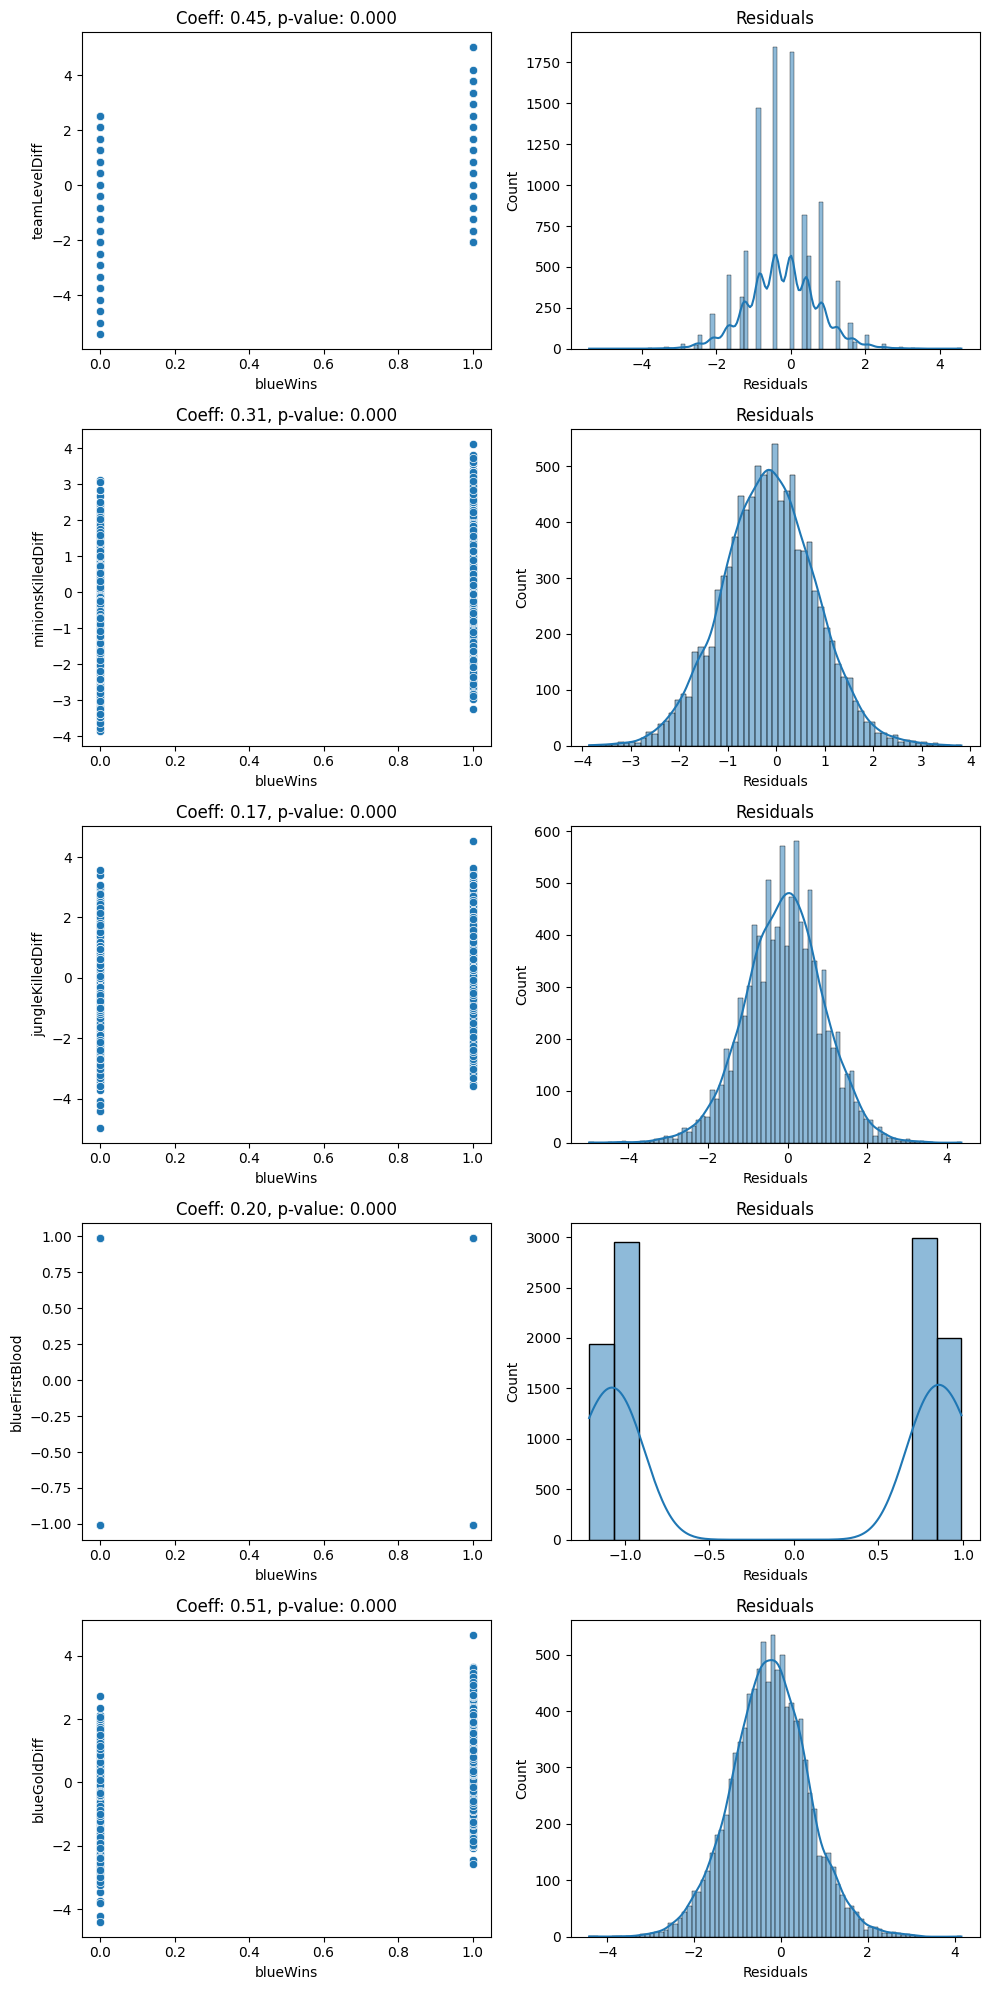

In [47]:
# We want to show MLR.5 and MLR.6 do hold. We do that by constructing several scatterplots with the x-axis the binary variable whether blue wins or not
# Since the data is distributed quite evenly. It would not be invalid to assume these two assumptions.
# MLR.5 and MLR.6 come into play when we conduct t-test. Even if they do not hold, t-test is asymptotically robust

vec_std = ['teamLevelDiff', 'minionsKilledDiff', 'jungleKilledDiff', 'blueFirstBlood', 'blueGoldDiff']

# create a 5x2 grid of subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(10, 20))

# loop over the variables and create scatter and histogram plots
for i, column in enumerate(vec_std):
    # create scatter plot
    sns.scatterplot(x='blueWins', y=column, data=LOL, ax=axs[i][0])
    axs[i][0].set_xlabel('blueWins')
    axs[i][0].set_ylabel(column)

    # fit linear regression and calculate residuals
    X = LOL[['blueWins']]
    y = LOL[column]
    model = sm.OLS(y, X).fit()
    residuals = model.resid

    # create histogram of residuals
    sns.histplot(residuals, ax=axs[i][1], kde=True)
    axs[i][1].set_xlabel('Residuals')
    axs[i][1].set_ylabel('Count')

    # set subplot titles to show the coefficient estimate and p-value
    axs[i][0].set_title(f'Coeff: {model.params[0]:.2f}, p-value: {model.pvalues[0]:.3f}')
    axs[i][1].set_title('Residuals')

# adjust subplot spacing and show plot
plt.tight_layout()
plt.show()
    



In [ ]:
#Analysis of the coefficient:
# MLR.5 and MLR.6 come into play when we conduct t-test. Even if they do not hold, t-test is asymptotically robust
#If we were to perform a hypothesis test with:
# Ho: beta4 = 0
# H1: beta4 ≠ 0
# We have a t-value of 1.98, which is too small to be rejeceted at a significance level of 0.05, so we fail to reject the null hypothesis

#The initial simple linear regression model (SLR) generated a high t-value of 20.473532 for the blueFirstBlood variable, 
#leading to a rejection of the null hypothesis. This result suggested a significant relationship between the win rate and 
#blueFirstBlood. However, after incorporating additional variables and conducting a multiple linear regression model (MLR), 
#the t-value for blueFirstBlood decreased to 1.984852, which failed to reject the null hypothesis. This change in the t-value 
#implies that the initial SLR model may have overestimated the relationship between the win rate and blueFirstBlood due to omitted 
#variable bias, just as we predicted.